# Bootcamp-Project-2-Data-Analysis
## =================
# Group members

- Fai Alamri 
- Omar Alnasser
- Hisham Altayieb 

## This analysis process will contain the following questions:
   - Which genres are most popular from year to year?
   - What kinds of properties are associated with movies that have high revenues?
   - How much revenue do movies get over the years based on their budget?
   - Does the amount of budget spent on a movie affect its rating?
   - Is there a correlation between the amount of movies a production make and their success?
   - Is there a correlation between the amount of movies a director makes and their success?
   - Is there a correlation between the revenue a movie gets and its rating?

## Importing and loading DFs, and the libraries 

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from datetime import datetime, timedelta

df_mv = pd.read_csv('tmdb-movies.csv')

# Exploratory Data Analysis

In [54]:
df_mv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## ==============================================================

In [55]:
#getting the datas mean, std, ...
df_mv.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## =======================================================================

In [56]:
#the average rating of movies
print("The average rating of movies in our dataset is:", df_mv["vote_average"].mean())

The average rating of movies in our dataset is: 5.974921774342001


## =======================================================================

In [57]:
#10 most used genres in our dataset
print("Top 10 used genres in our dataset:")
df_mv["genres"].value_counts().head(10)

Top 10 used genres in our dataset:


Comedy                  712
Drama                   712
Documentary             312
Drama|Romance           289
Comedy|Drama            280
Comedy|Romance          268
Horror|Thriller         259
Horror                  253
Comedy|Drama|Romance    222
Drama|Thriller          138
Name: genres, dtype: int64

## =======================================================================

In [58]:
#directors with the most number of movies made
print("directors with the number of movies they made:")
df_mv['director'].value_counts().head(10)

directors with the number of movies they made:


Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

## =======================================================================


## Data Cleaning 

- ### Drop columns that will not be using:

In [59]:
# Here we selecting columns we will not be using to drop it.
DropCol = ['imdb_id', 'cast','homepage','tagline','keywords','overview']
# Dropping columns
df_mv = df_mv.drop(DropCol, axis=1)

- ### Handling the NaN values, missing values, duplicated data and zero values.


##### Handling the NaN values.

In [60]:
# First We want to find the column that has NaN values.
df_mv.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

- From the previous output we know now that only three columns that have NaN values director, genres and production_companies.

In [61]:
# First will select the column we want.
NaNCol = ['director','genres','production_companies']

# Will use .fillna to replace all the NaN values with 'Unknown'
df_mv[NaNCol] = df_mv[NaNCol].fillna('Unknown') 

# checking
df_mv.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

## =======================================================================

##### Handling the Zeros values:

- ##### Some rows in the budget_adj were zeros so we replaced them with the mean.

In [62]:
df_mv.loc[30,'budget_adj']


0.0

In [63]:
df_mv['budget_adj'].mean()

17551039.822886847

In [64]:
df_mv['budget_adj'].replace(0,df_mv['budget_adj'].mean(axis=0),inplace=True)


In [65]:
df_mv.loc[30,'budget_adj']

17551039.822886847

- ##### Some rows in the revenue_adj were zeros so we replaced them with the mean value

In [66]:
df_mv.loc[48,'revenue_adj']


0.0

In [67]:
df_mv['revenue_adj'].mean()


51364363.25325093

In [68]:
df_mv['revenue_adj'].replace(0,df_mv['revenue_adj'].mean(axis=0),inplace=True)


In [69]:
df_mv.loc[48,'revenue_adj'] #to make sure


51364363.25325093

- ##### Some rows in the revenue were zeros so we replaced them with the mean value

In [70]:
df_mv.loc[48,'revenue']

0

In [71]:
df_mv['revenue'].mean()


39823319.79339223

In [72]:
df_mv['revenue'].replace(0,df_mv['revenue'].mean(axis=0),inplace=True)


In [73]:
df_mv.loc[48,'revenue']

39823319.79339223

- ##### Some rows in the budget were zeros so we replaced them with the mean value

In [74]:
df_mv.loc[30,'budget']


0

In [75]:
df_mv['budget'].mean()


14625701.09414688

In [76]:
df_mv['budget'].replace(0,df_mv['budget'].mean(axis=0),inplace=True)


In [77]:
df_mv.loc[30,'budget']


14625701.09414688

## =======================================================================


##### Handling the duplicated data:

In [78]:
# First we check if there is any duplication.
df_mv.duplicated().sum()

1

- From the previous output we now know that there is one duplicated row.

In [79]:
# Dropping the duplicated rows.
df_mv.drop_duplicates(inplace=True)

In [80]:
# Checking
df_mv.duplicated().sum()

0

## =======================================================================



###  Question 1 (Which genres are most popular from year to year?)

There are 21 genres in the dataset so now we will look into what is the most popular for each year after separating them for every single genre. 

In [81]:
selected_columns = df_mv[["genres","release_year"]]
new_df = selected_columns.copy()
new_df

,genres,release_year
0,Action|Adventure|Science Fiction|Thriller,2015
1,Action|Adventure|Science Fiction|Thriller,2015
2,Adventure|Science Fiction|Thriller,2015
3,Action|Adventure|Science Fiction|Fantasy,2015
4,Action|Crime|Thriller,2015
...,...,...
10861,Documentary,1966
10862,Action|Adventure|Drama,1966
10863,Mystery|Comedy,1966
10864,Action|Comedy,1966


In [82]:
genre_count = dict()

genre = list(new_df['genres'])

for items in genre:
    genre_item = items.split('|')
    for item in genre_item:
        if item in genre_count.keys():
            genre_count[item] += 1
        else:
            genre_count[item] = 1
genre_count

{'Action': 2384,
 'Adventure': 1471,
 'Science Fiction': 1229,
 'Thriller': 2907,
 'Fantasy': 916,
 'Crime': 1354,
 'Western': 165,
 'Drama': 4760,
 'Family': 1231,
 'Animation': 699,
 'Comedy': 3793,
 'Mystery': 810,
 'Romance': 1712,
 'War': 270,
 'History': 334,
 'Music': 408,
 'Horror': 1637,
 'Documentary': 520,
 'TV Movie': 167,
 'Unknown': 23,
 'Foreign': 188}

In [83]:
df1 = new_df.join(new_df['genres'].str.split('|', expand=True)).drop('genres', axis=1)

df_final = (pd.melt(df1, id_vars=['release_year']).groupby(['release_year', 'value']).count()
            .rename(columns={'variable':'count'}).reset_index() )




df_final

,release_year,value,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
...,...,...,...
1059,2015,TV Movie,20
1060,2015,Thriller,171
1061,2015,Unknown,2
1062,2015,War,9


- ### Here we want to display which genres are most popular from 1960 to 2015, by displaying it in two chart one from 1960 till 1999,and the second from 2000 till 2015.

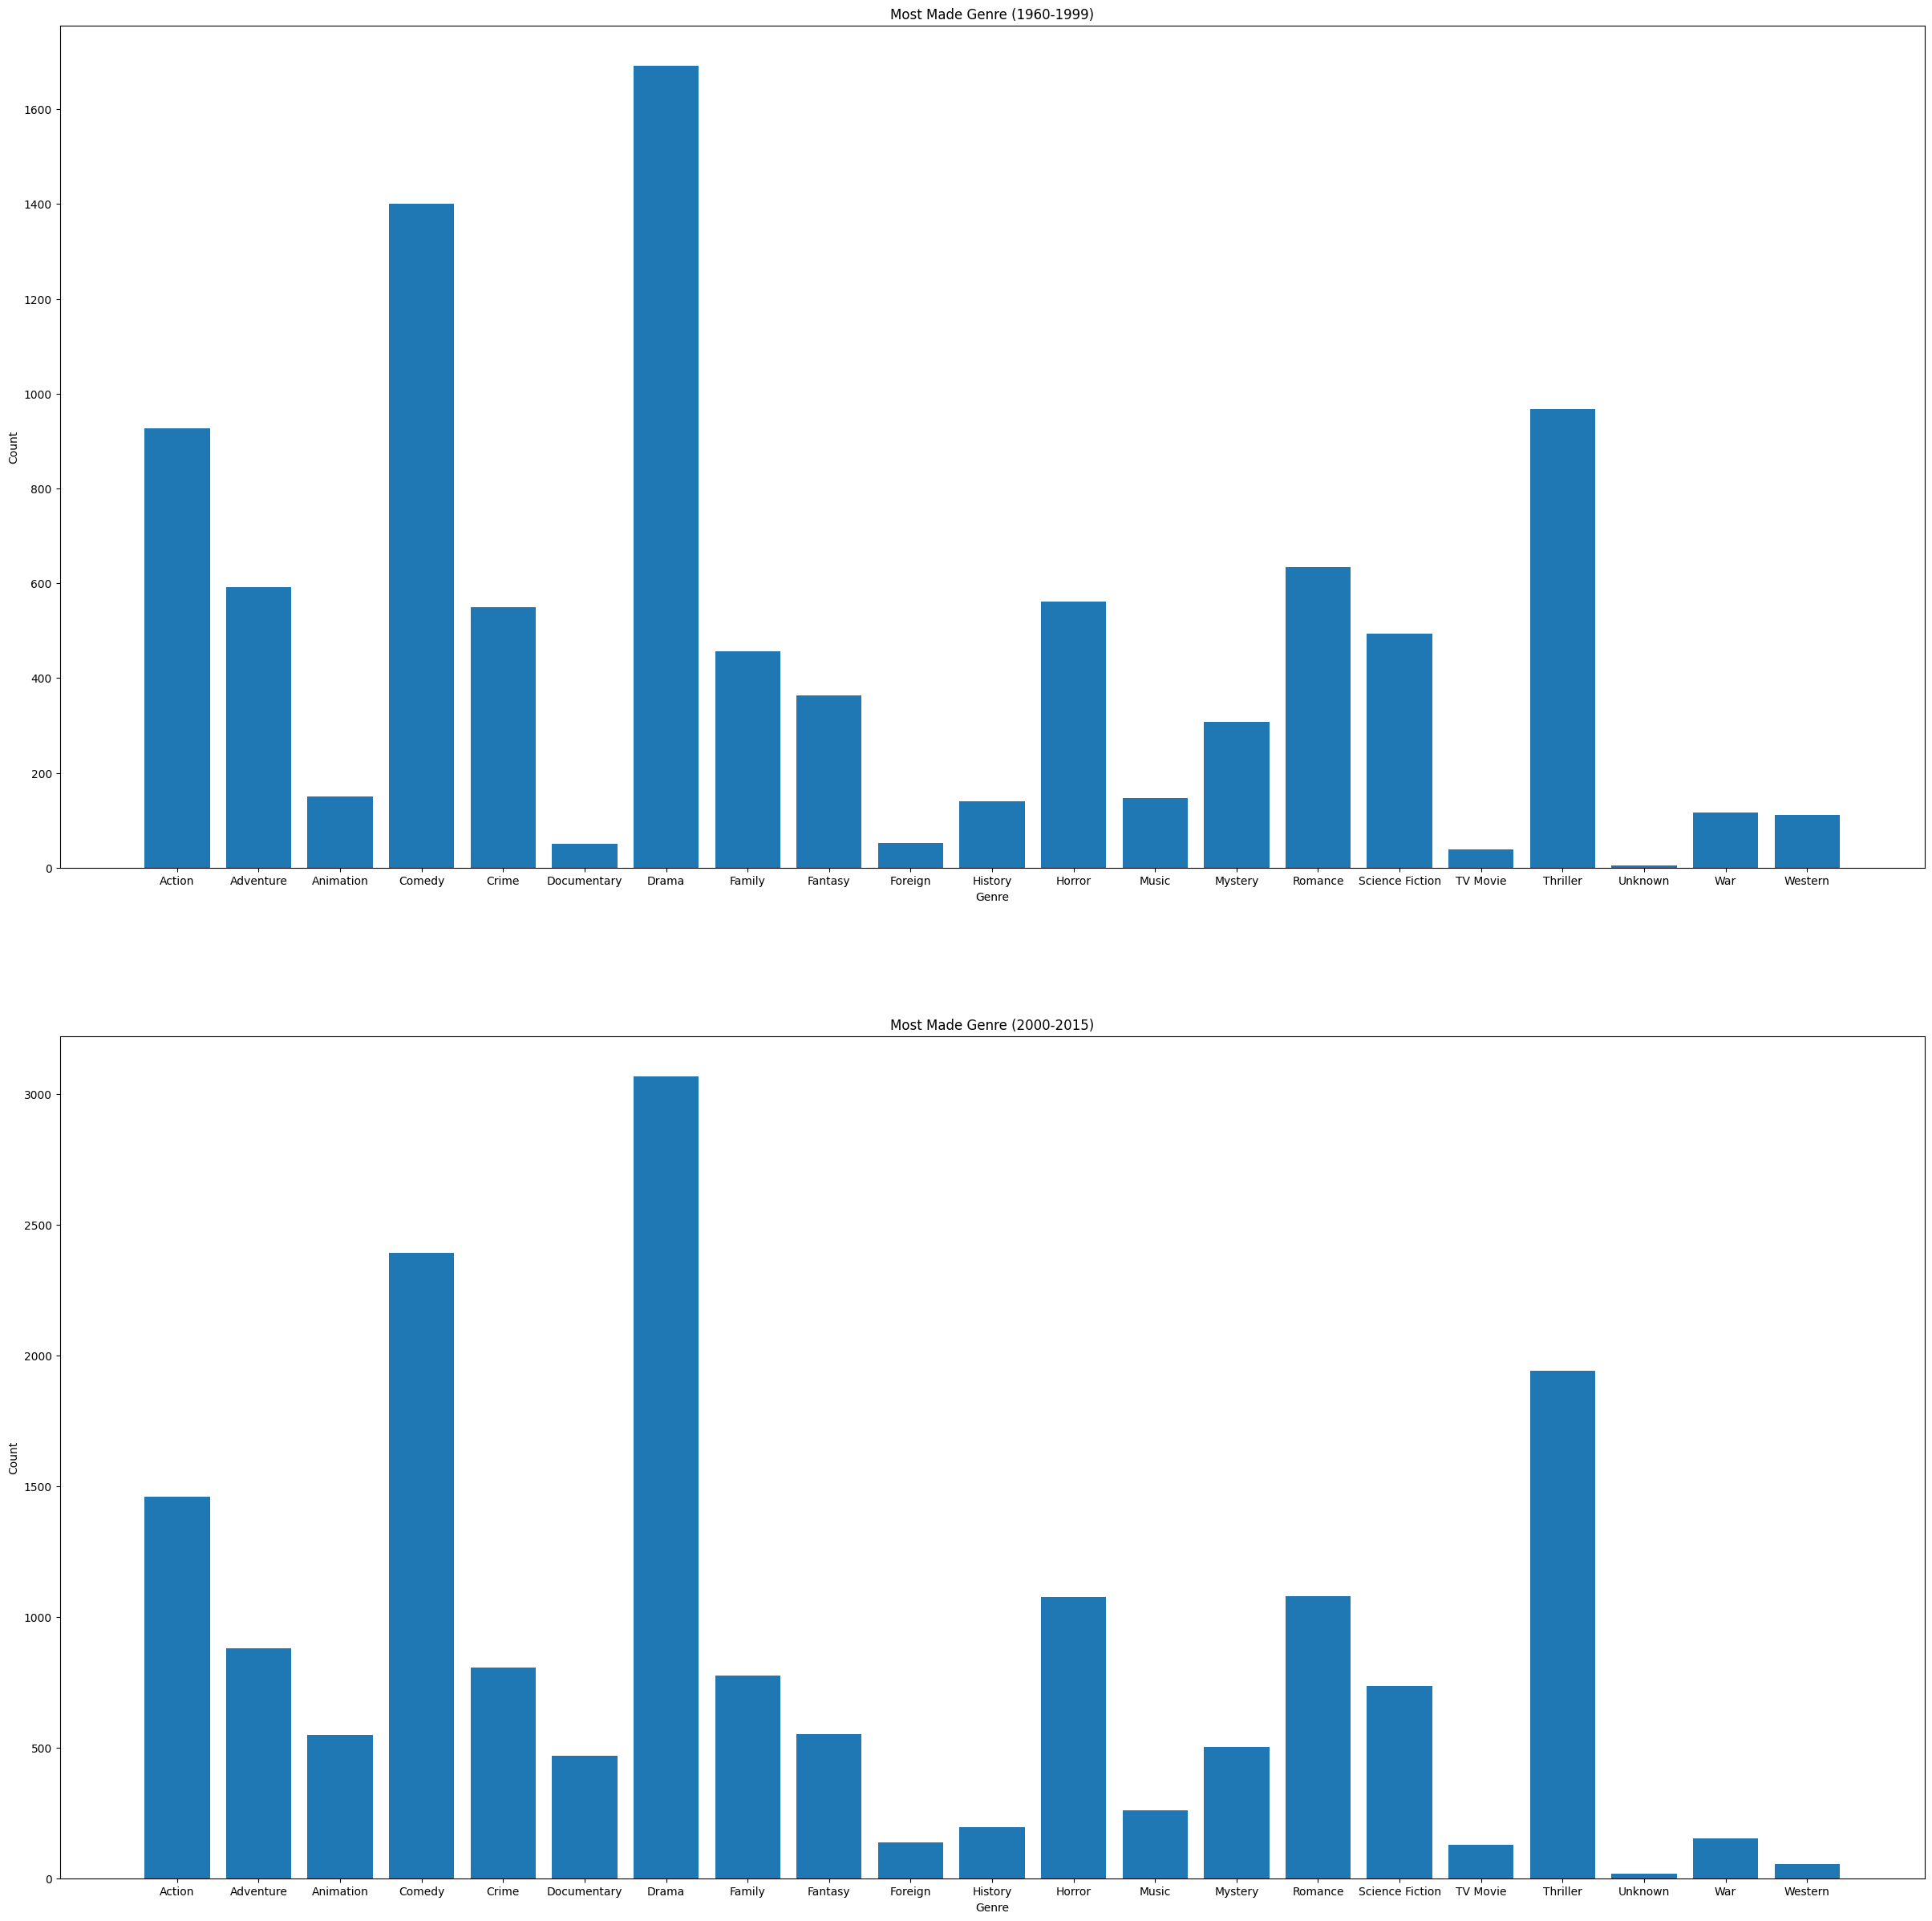

In [84]:
# Filter the data for 1960-1999
filter1 = df_final[(df_final['release_year'] >= 1960) & (df_final['release_year'] <= 1999)]

# Filter the data for 2000-2015
filter2 = df_final[(df_final['release_year'] >= 2000) & (df_final['release_year'] <= 2015)]
# Calculate the most made genre for 1960-1999
genreCount1 = filter1.groupby('value')['count'].sum()
most_made_genre_1 = genreCount1.idxmax()

# Calculate the most made genre for 2000-2015
genreCount2 = filter2.groupby('value')['count'].sum()
most_made_genre_2 = genreCount2.idxmax()



fig, axes = plt.subplots(2, 1, figsize=(30, 30))

# Plot for 1960-1999
axes[0].bar(genreCount1.index, genreCount1.values)
axes[0].set_title('Most Made Genre (1960-1999)')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')

# Plot for 2000-2015
axes[1].bar(genreCount2.index, genreCount2.values)
axes[1].set_title('Most Made Genre (2000-2015)')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Count')


plt.show()

In [85]:
df_max = df_final.merge(df_final.groupby(['release_year'])['count'].max().reset_index(), left_on=['release_year', 'count'],
                right_on=['release_year', 'count'], how='right')
df_max


,release_year,value,count
0,1960,Drama,13
1,1961,Drama,16
2,1962,Drama,21
3,1963,Comedy,13
4,1963,Drama,13
5,1964,Drama,20
6,1965,Drama,20
7,1966,Comedy,16
8,1966,Drama,16
9,1967,Comedy,17


In [86]:
df_max.query('value == "Drama"').count()

release_year    48
value           48
count           48
dtype: int64

In [87]:
df_max.query('value == "Drama"').sum()

release_year                                                95386
value           DramaDramaDramaDramaDramaDramaDramaDramaDramaD...
count                                                        4251
dtype: object

In [88]:
countGenre = df_mv['genres'].str.split('|', expand=True).stack().value_counts()
#deleting "TV Movies" genre
countGenreD=countGenre.drop(countGenre.index[-2])
print(countGenreD)

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Unknown              23
dtype: int64


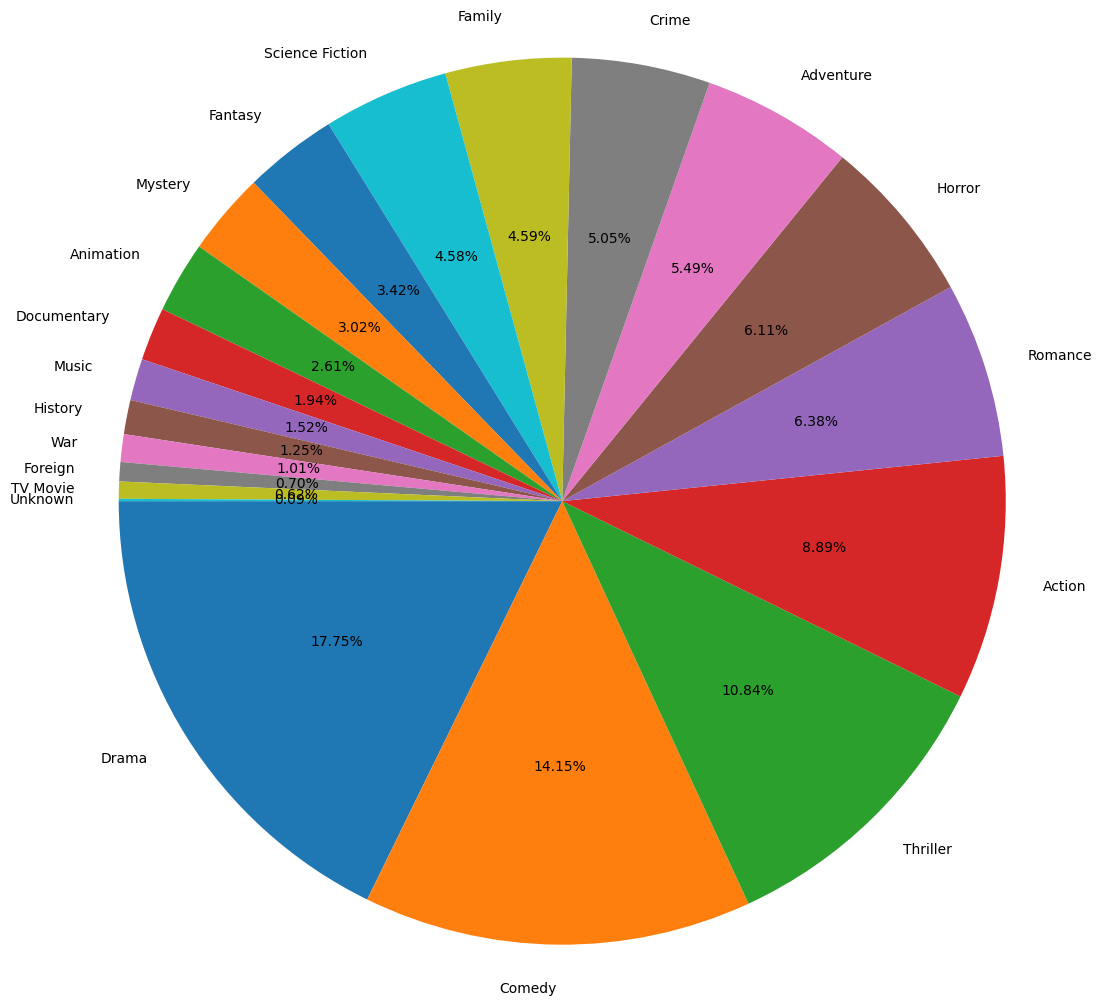

In [89]:
#visualizing genres using pie chart
plt.pie(countGenreD, labels=countGenreD.index, autopct='%1.2f%%',  startangle=180, radius=3)
plt.show()

## ==================================================================


###  Question 2 (Which is What kinds of properties are associated with movies that have high revenues?)

According to IMDB top rated 250 movies are above 8.0 unfortunately there is no standard rating even though in other websites such as rotten tomato.


So we will look into movies that have larger revenues which is above the mean and then check if it has 8.0 < rating or not and also I will make sure the revenues is higher than the average 

source : [IMDB top rated movies](https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=9S9ZTYQ2Z3V30C03YNDV&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=bottom&ref_=chtbtm_ql_3)

In [90]:
df_mv["revenue"].mean()


61877249.67804794

In [91]:

mask= df_mv[(df_mv['revenue'] >= 61877249.678053163) & (df_mv['vote_average'] >=8.0 )]
mask.count()


id                      13
popularity              13
budget                  13
revenue                 13
original_title          13
director                13
runtime                 13
genres                  13
production_companies    13
release_date            13
vote_count              13
vote_average            13
release_year            13
budget_adj              13
revenue_adj             13
dtype: int64

In [92]:
mask

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9,150540,6.326804,1.750000e+08,8.537086e+08,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
629,157336,24.949134,1.650000e+08,6.217525e+08,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
636,205596,8.110711,1.400000e+07,2.335557e+08,The Imitation Game,Morten Tyldum,113,History|Drama|Thriller|War,Black Bear Pictures|Bristol Automotive,11/14/14,3478,8.0,2014,1.289527e+07,2.151261e+08
2409,550,8.947905,6.300000e+07,1.008538e+08,Fight Club,David Fincher,139,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,10/14/99,5923,8.1,1999,8.247033e+07,1.320229e+08
2414,497,2.719461,6.000000e+07,2.846000e+08,The Green Mile,Frank Darabont,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,12/10/99,2299,8.0,1999,7.854317e+07,3.725564e+08
2722,331214,0.537593,1.462570e+07,1.250000e+08,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,1.755104e+07,1.539360e+08
2875,155,8.466668,1.850000e+08,1.001922e+09,The Dark Knight,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09
4177,680,8.093754,8.000000e+06,2.139288e+08,Pulp Fiction,Quentin Tarantino,154,Thriller|Crime,Miramax Films|A Band Apart|Jersey Films,10/14/94,5343,8.1,1994,1.176889e+07,3.147131e+08
4179,13,6.715966,5.500000e+07,6.779454e+08,Forrest Gump,Robert Zemeckis,142,Comedy|Drama|Romance,Paramount Pictures,7/6/94,4856,8.1,1994,8.091114e+07,9.973333e+08
7269,238,5.738034,6.000000e+06,2.450664e+08,The Godfather,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,3/15/72,3970,8.3,1972,3.128737e+07,1.277914e+09


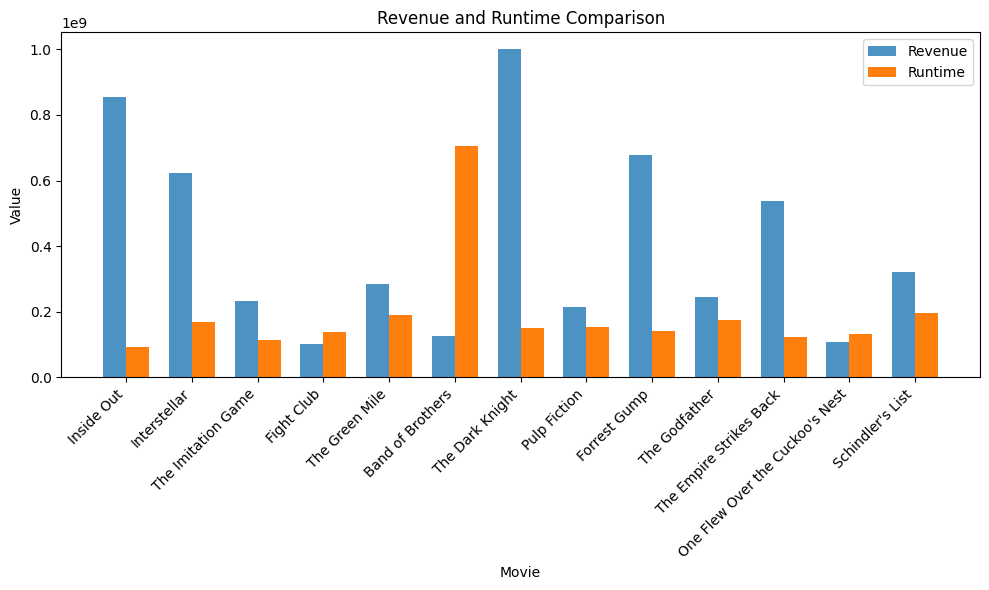

In [93]:

revenue = mask['revenue']
runtime = mask['runtime']*1000000


fig, ax = plt.subplots(figsize=(10, 6))
index = range(len(revenue))
bar_width = 0.35

rects1 = ax.bar(index, revenue, bar_width, label='Revenue', alpha=0.8)
rects2 = ax.bar([i + bar_width for i in index], runtime, bar_width, label='Runtime', alpha=1)


ax.set_xlabel('Movie')
ax.set_ylabel('Value')
ax.set_title('Revenue and Runtime Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(mask['original_title'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


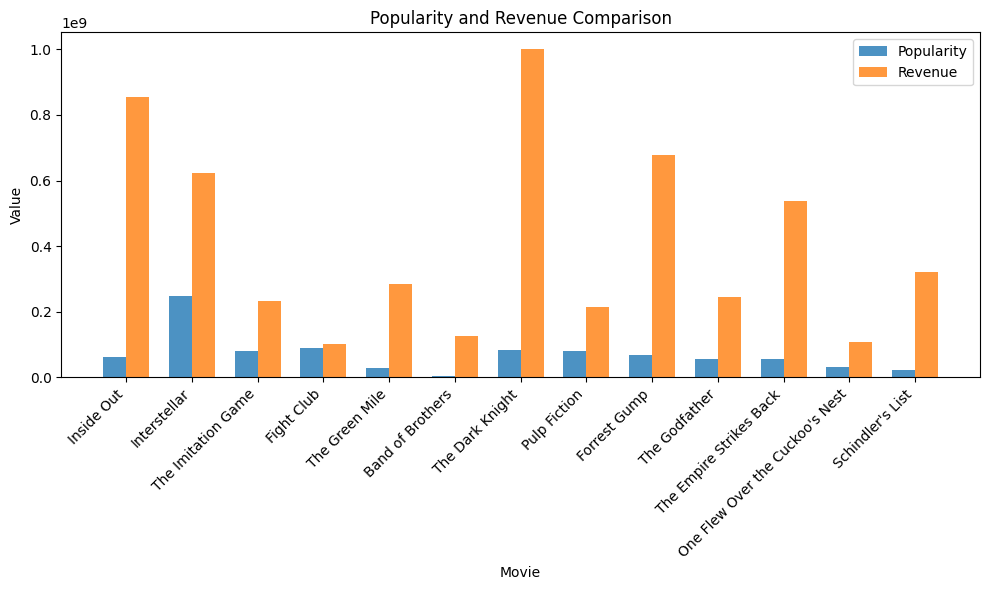

In [94]:

revenue = mask['revenue']
popularity = mask['popularity'] * 10000000 # Adjust the scale of popularity values
movies = mask['original_title']


fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(revenue))
bar_width = 0.35

rects1 = ax.bar(index, popularity, bar_width, label='Popularity', alpha=0.8)
rects2 = ax.bar([i + bar_width for i in index], revenue, bar_width, label='Revenue', alpha=0.8)


ax.set_xlabel('Movie')
ax.set_ylabel('Value')
ax.set_title('Popularity and Revenue Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(movies, rotation=45, ha='right')
ax.legend()


plt.tight_layout()
plt.show()


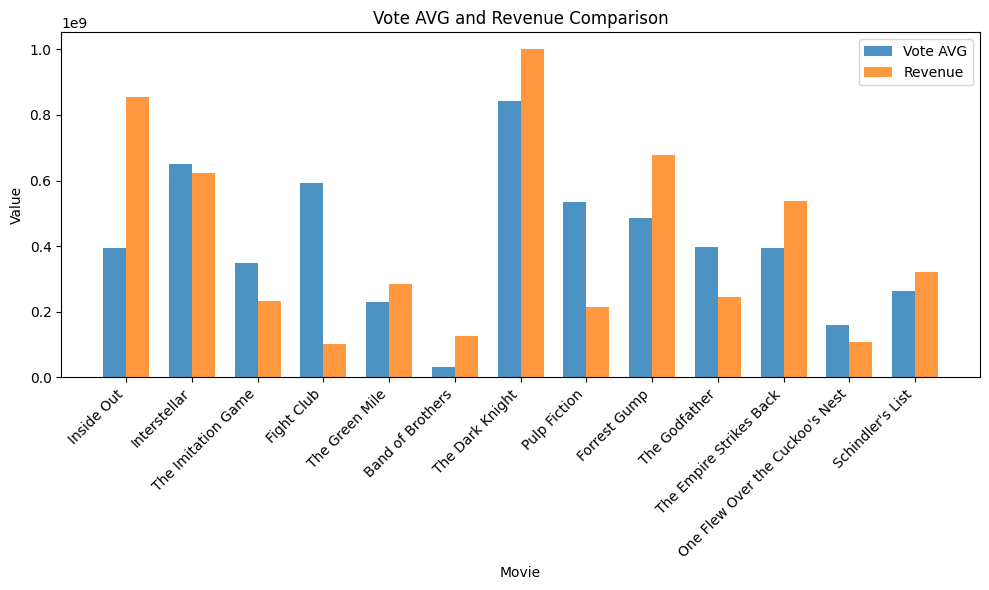

In [107]:

revenue = mask['revenue']
vote_count = mask['vote_count'] * 100000
movies = mask['original_title']


fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(revenue))
bar_width = 0.35

bar1 = ax.bar(index, vote_count, bar_width, label='Vote AVG', alpha=0.8)
bar2 = ax.bar([i + bar_width for i in index], revenue, bar_width, label='Revenue', alpha=0.8)


ax.set_xlabel('Movie')
ax.set_ylabel('Value')
ax.set_title('Vote AVG and Revenue Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(movies, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## ==================================================================

###  Question 3 (How much revenue do movies get over the years based on their budget?)

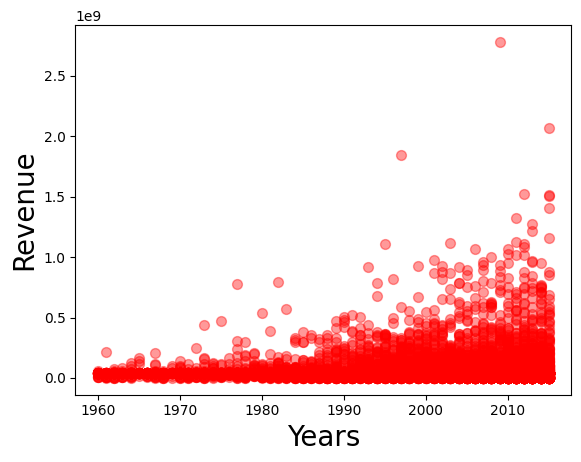

In [96]:
#revenue increases with the years (by billions)
plt.scatter(df_mv['release_year'], df_mv['revenue'], s = 50, c='red', alpha=0.4) 
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Revenue',fontsize = 20)
plt.show();

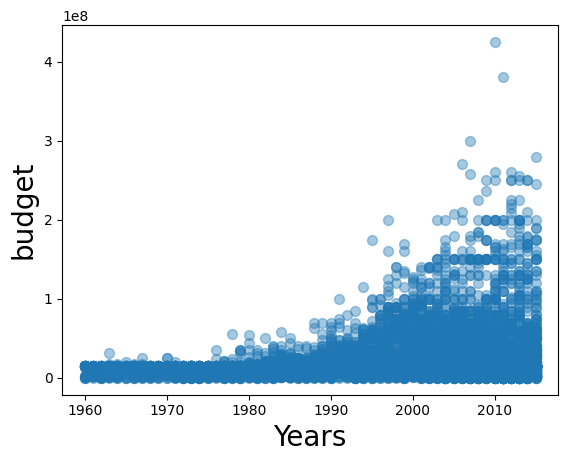

In [97]:
#budget's increase is steeper but not as strong as the revenue(100 millions)
plt.scatter(df_mv['release_year'], df_mv['budget'], s = 50, alpha=0.4) 
plt.xlabel('Years',fontsize = 20)
plt.ylabel('budget',fontsize = 20)
plt.show();

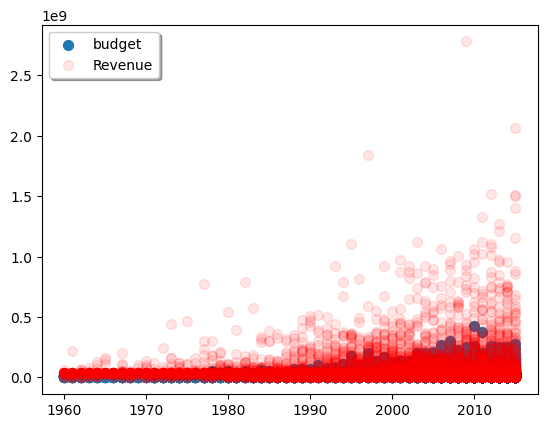

In [98]:
#showing the correlation between budgets and revenue over the years
plt.scatter(df_mv['release_year'], df_mv['budget'], s = 50, alpha=1) 
plt.scatter(df_mv['release_year'], df_mv['revenue'], s = 50, c='red', alpha=0.1) 
#plt.plot(movie['release_year'], movie['revenue'], color = 'red')
plt.legend(['budget','Revenue'], shadow = True, loc = 0)
#conclusion: budgets increase is steady where revenues increase is steeper with the years
plt.show()

## ==================================================================

###  Question 4 (Does the amount of budget spent on a movie affect its rating?)

In [99]:
#getting top 20 movies with their budget
budgetToRating=df_mv[['vote_average','budget']].sort_values(['budget'], ascending=[False]).head(20)

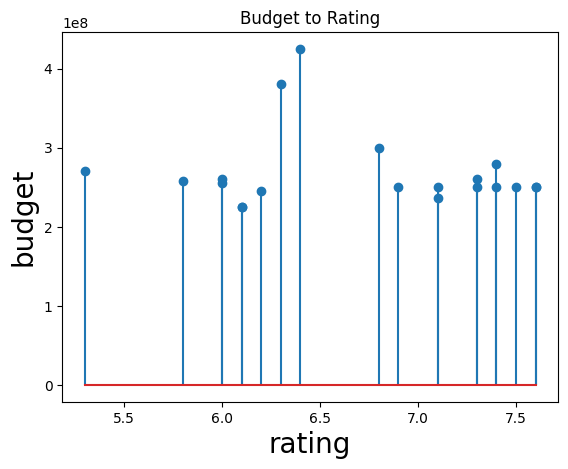

In [100]:
#checking if budget affects rating using stem chart
plt.title("Budget to Rating")
plt.xlabel('rating',fontsize = 20)
plt.ylabel('budget',fontsize = 20)
plt.stem(budgetToRating['vote_average'], budgetToRating['budget'])
plt.show()

## ==================================================================

###  Question 5 (Is there a correlation between the amount of movies a production make and their success?)

C:\Users\20his\AppData\Local\Temp\ipykernel_41728\240839391.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(x.index, rotation=90)
C:\Users\20his\AppData\Local\Temp\ipykernel_41728\240839391.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(x.index, rotation=90)


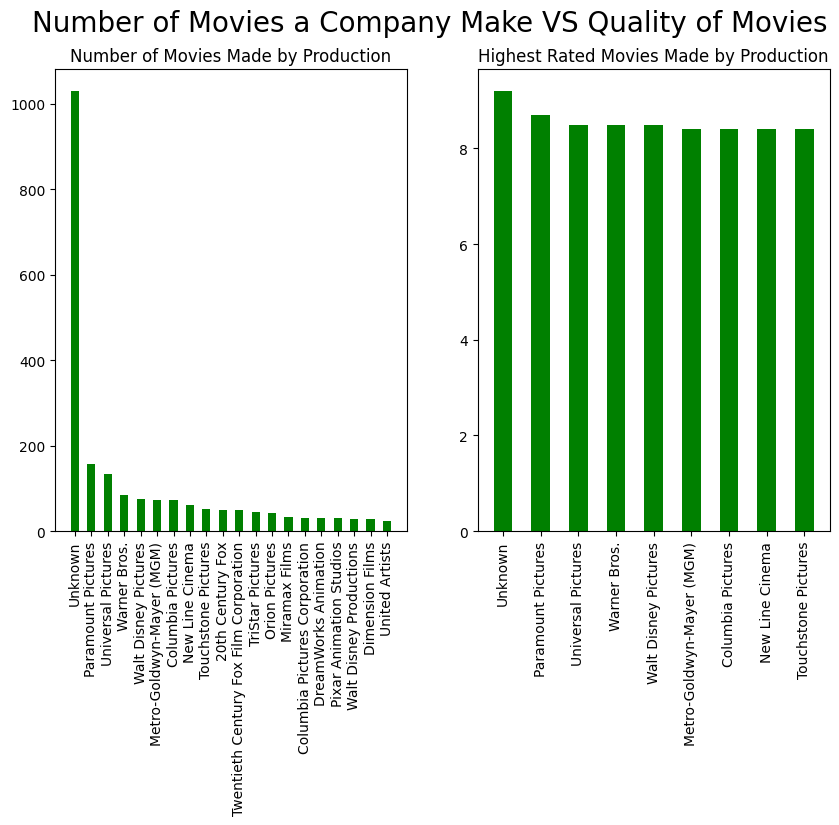

In [101]:
#defining super title and number of columns for the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Number of Movies a Company Make VS Quality of Movies', fontsize = 20)
#chart for the number of movies made by a production
y=np.array(df_mv['production_companies'].value_counts().head(20))
x=df_mv['production_companies'].value_counts().head(20)
axes[0].set_title("Number of Movies Made by Production")
axes[0].bar(x.index, y, color='green', width=0.5)
#rotating x labels
axes[0].set_xticklabels(x.index, rotation=90)

#preparing data for the second chart
companyToRating=df_mv[['production_companies','vote_average']].sort_values(['vote_average'], ascending=[False]).head(20)
#removing "float" values so visualization can occur
companyToRating=companyToRating.dropna()
#chart for the highest rate movies made by a production
rating=np.array(companyToRating['vote_average'])
companyR=np.array(companyToRating['production_companies'])
axes[1].set_title("Highest Rated Movies Made by Production")
axes[1].bar(companyR, rating, color='green', width=0.5)
#rotating x labels
axes[1].set_xticklabels(x.index, rotation=90)
plt.show()

## ==================================================================

###  Question 6 (Is there a correlation between the amount of movies a director makes and their success?)

C:\Users\20his\AppData\Local\Temp\ipykernel_41728\1328010089.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(directors.index, rotation=90)
C:\Users\20his\AppData\Local\Temp\ipykernel_41728\1328010089.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(directorR, rotation=90)


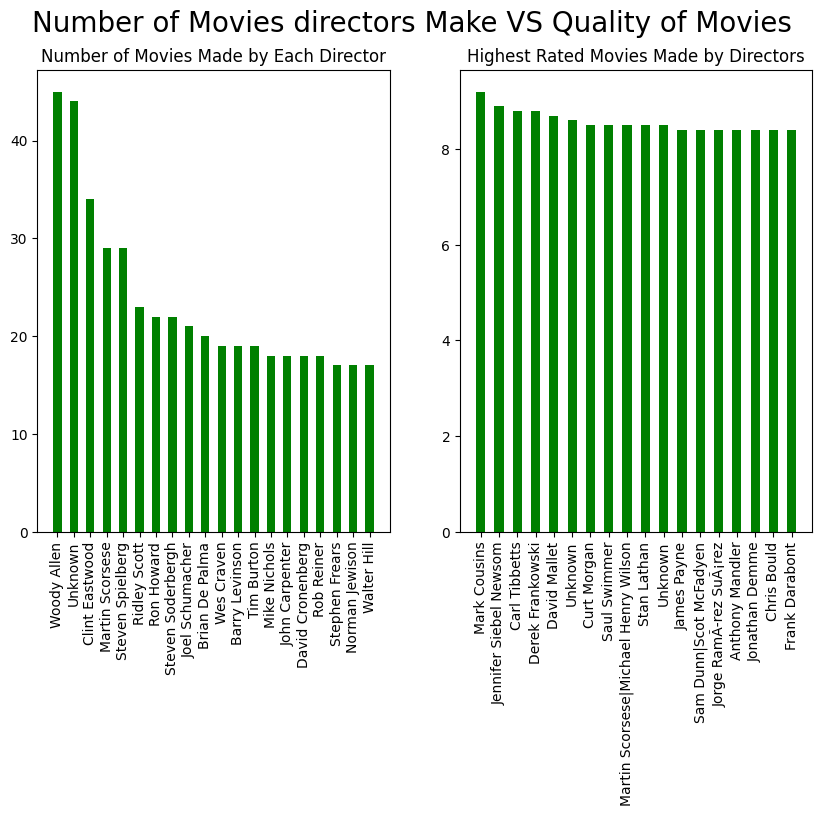

In [102]:
#defining super title and number of columns for the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Number of Movies directors Make VS Quality of Movies', fontsize = 20)

#chart for the number of movies made by a director
y=np.array(df_mv['director'].value_counts().head(20))
directors=df_mv['director'].value_counts().head(20)
axes[0].set_title("Number of Movies Made by Each Director")
axes[0].bar(directors.index, y, color='green', width=0.5)
#rotating x labels
axes[0].set_xticklabels(directors.index, rotation=90)

#preparing data for the second chart
directorToRating=df_mv[['director','vote_average']].sort_values(['vote_average'], ascending=[False]).head(20)
#removing "float" values so visualization can occur
directorToRating=directorToRating.dropna()

#chart for the highest rate movies made by a director
drating=np.array(directorToRating['vote_average'])
directorR=np.array(directorToRating['director'])
axes[1].set_title("Highest Rated Movies Made by Directors")
axes[1].bar(directorR, drating, color='green', width=0.5)
#rotating x labels
axes[1].set_xticklabels(directorR, rotation=90)
plt.show()

## ==================================================================

###  Question 6 (Is there a correlation between the revenue a movie gets and its rating?)

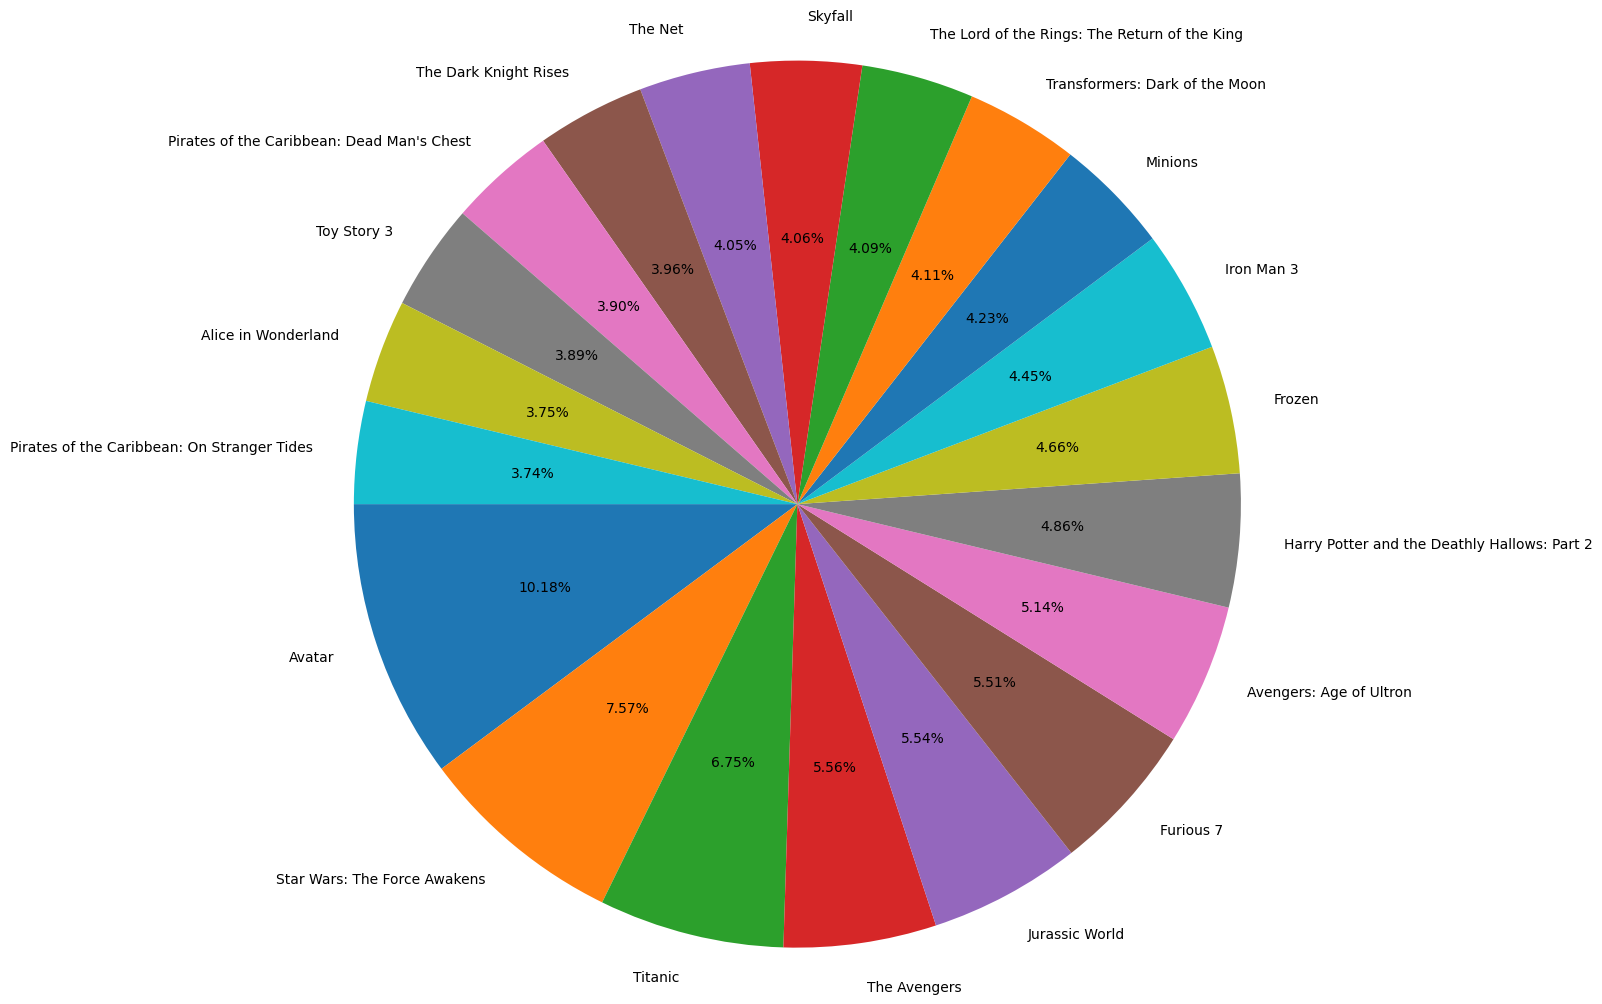

In [103]:
#movies with highest revenue sorted in a pie chart

#defining values
movieToRevenue=df_mv[['original_title','revenue']].sort_values(['revenue'], ascending=[False]).head(20)
#pie chart with top 20 movies with the highest revenue
plt.pie(movieToRevenue['revenue'], labels=movieToRevenue['original_title'], autopct='%1.2f%%',  startangle=180,  radius=3)
plt.show()

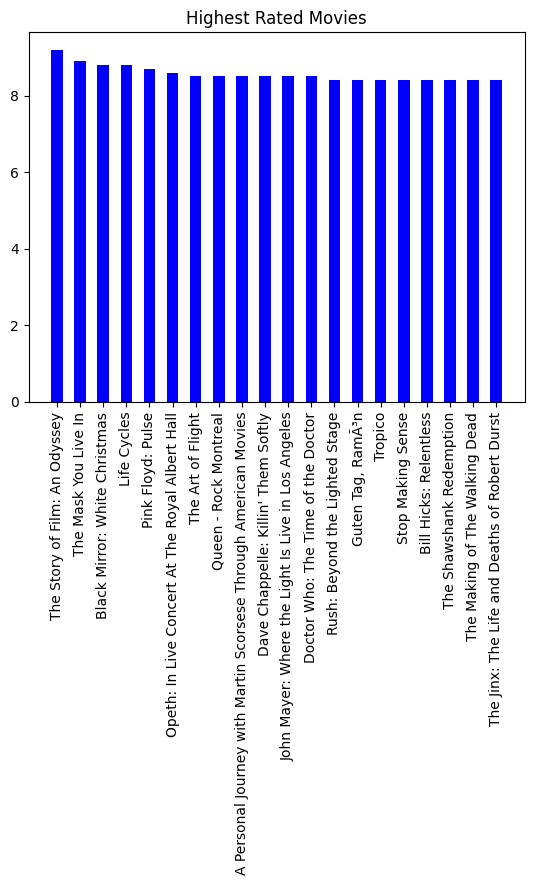

In [104]:
#showing top 20 movies using bar chart

#highest rated movies
movieToRating=df_mv[['original_title','vote_average']].sort_values(['vote_average'], ascending=[False]).head(20)
movieToRating['original_title']
#plotting the chart
plt.title("Highest Rated Movies")
plt.bar(movieToRating['original_title'], movieToRating['vote_average'], color='blue', width=0.5)
plt.xticks(rotation='vertical')
plt.show()

# Conclusions

According to our questions, we do not need missing values such as keywords, tagline, director, homepage, and production_companies, due to it don't have any effect on our data analysis process. We found that there were 10866 rows in the dataset with a variety of data types and some missing values. During our analysis, we are only interested in genres and release years columns, as well as some zero values in the revenue column and the budget column. A few changes have been made to some types of data to make calculations easier, including replacing zero values with column means, removing duplicates, and replacing zero values with column means. The first question we asked was: what genres are most popular over the year? We ended up with 21 genres. As a result, a total of 4251 movies were watched in 48 years in drama and comedy genres. Then, we moved on to our second question: What kinds of properties are associated with movies with high revenues? And that led us to search through the internet websites specializing in movie ratings such as IMDB and Rotten Tomatoes. Then, we found that a good movie must be above an 8.0 rating so we calculated the mean average revenue for all movies that are above an 8.0 rating to decide which movie is higher than the average. We found that 13 movies have higher revenue than the average and above 8.0 rate than we did with our visualization.